# Analysis of GDP across different countries and continents from 2020 to 2025

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

Here, we get our data from a website table.

In [101]:
url = "https://statisticstimes.com/geography/countries-by-continents.php"
tables = pd.read_html(url)

for i, table in enumerate(tables):
    print(table.head())

df = tables[-1]
df_clean = df[['Country or Area','Continent']].rename(columns={'Country or Area':'Country'})
print(df_clean.head())

        0                                   1
0  Source  United Nations Statistics Division
1    Date                         22 Oct 2019
  Region Region.1            Region.2        Region.3  M49 code  Total
0  World      NaN                 NaN             NaN         1    249
1    NaN   Africa                 NaN             NaN         2     60
2    NaN      NaN     Northern Africa             NaN        15      7
3    NaN      NaN  Sub-Saharan Africa             NaN       202     53
4    NaN      NaN                 NaN  Eastern Africa        14     22
   No Country or Area ISO-alpha3 Code  M49 Code         Region 1 Region 2  \
0   1     Afghanistan             AFG         4    Southern Asia      NaN   
1   2   Åland Islands             ALA       248  Northern Europe      NaN   
2   3         Albania             ALB         8  Southern Europe      NaN   
3   4         Algeria             DZA        12  Northern Africa      NaN   
4   5  American Samoa             ASM        16    

This is the data we got from Kaggle.

In [144]:
country = pd.read_csv('data.csv');
print(country.head())

       Country    2020      2021      2022      2023      2024      2025
0  Afghanistan   20136   14278.0   14501.0   17248.0       NaN       NaN
1      Albania   15271   18086.0   19185.0   23388.0   27259.0   28372.0
2      Algeria  164774  185850.0  225709.0  247789.0  264913.0  268885.0
3      Andorra    2885    3325.0    3376.0    3786.0    4038.0    4035.0
4       Angola   66521   84375.0  142442.0  109764.0  115946.0  113343.0


In [145]:
country_ag = country.melt(id_vars='Country',var_name='year',value_name='gdp')
print(country_ag)

          Country  year       gdp
0     Afghanistan  2020   20136.0
1         Albania  2020   15271.0
2         Algeria  2020  164774.0
3         Andorra  2020    2885.0
4          Angola  2020   66521.0
...           ...   ...       ...
1171      Vietnam  2025  490970.0
1172    Palestine  2025       NaN
1173        Yemen  2025   17401.0
1174       Zambia  2025   28910.0
1175     Zimbabwe  2025   38172.0

[1176 rows x 3 columns]


In [146]:
nepal = country_ag[country_ag['Country'] == 'Nepal']
print(nepal)

     Country  year      gdp
122    Nepal  2020  33434.0
318    Nepal  2021  36927.0
514    Nepal  2022  41183.0
710    Nepal  2023  40907.0
906    Nepal  2024  43419.0
1102   Nepal  2025  46080.0


In [147]:
zimbabwe = country_ag[country_ag['Country'] == 'Zimbabwe']
print(zimbabwe)

       Country  year      gdp
195   Zimbabwe  2020  26878.0
391   Zimbabwe  2021  36016.0
587   Zimbabwe  2022  32613.0
783   Zimbabwe  2023  35144.0
979   Zimbabwe  2024  35224.0
1175  Zimbabwe  2025  38172.0


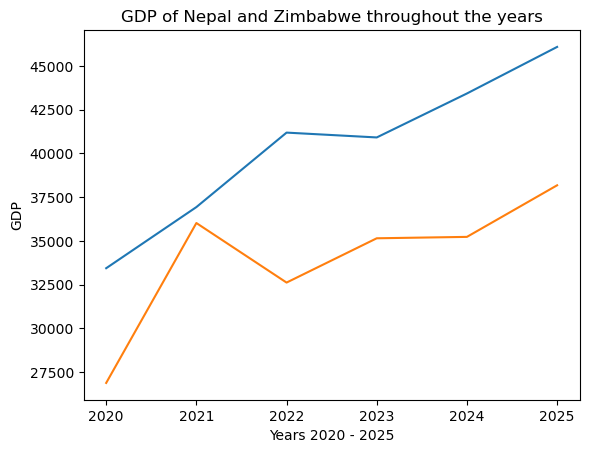

In [148]:
sns.lineplot(x=nepal['year'],y=nepal['gdp'])

sns.lineplot(x=zimbabwe['year'],y=zimbabwe['gdp'])
plt.title('GDP of Nepal and Zimbabwe throughout the years')
plt.xlabel('Years 2020 - 2025')
plt.ylabel('GDP')
plt.show()

In [107]:
mostGDP = country_ag[country_ag['gdp'] == max(country_ag['gdp'])]
print(mostGDP)

            Country  year         gdp
1166  United States  2025  30507217.0


In [108]:
mostGDPCountry = mostGDP['Country'].iloc[0]
print(mostGDPCountry)

United States


In [109]:
now = country_ag[country_ag['Country'] == mostGDPCountry]
print(now)

            Country  year         gdp
186   United States  2020  21354125.0
382   United States  2021  23681175.0
578   United States  2022  26006900.0
774   United States  2023  27720725.0
970   United States  2024  29184900.0
1166  United States  2025  30507217.0


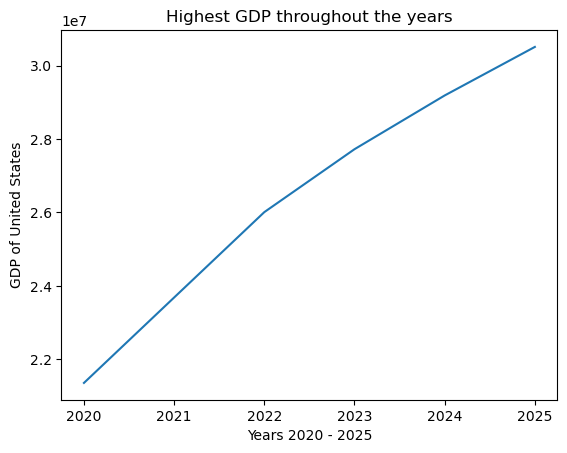

In [110]:
sns.lineplot(x=now['year'], y=now['gdp'])
plt.title('Highest GDP throughout the years')
plt.xlabel('Years 2020 - 2025')
plt.ylabel('GDP of United States')
plt.show()

In [111]:
top5GDP2020 = country_ag.sort_values(by=['gdp','Country'], ascending=[False, True]).head(25)
print(top5GDP2020)

            Country  year         gdp
1166  United States  2025  30507217.0
970   United States  2024  29184900.0
774   United States  2023  27720725.0
578   United States  2022  26006900.0
382   United States  2021  23681175.0
186   United States  2020  21354125.0
1016          China  2025  19231705.0
820           China  2024  18748009.0
428           China  2022  18307816.0
624           China  2023  18270351.0
232           China  2021  18190803.0
36            China  2020  15103357.0
85            Japan  2020   5054069.0
281           Japan  2021   5039148.0
1044        Germany  2025   4744804.0
848         Germany  2024   4658526.0
652         Germany  2023   4527009.0
260         Germany  2021   4351188.0
477           Japan  2022   4262146.0
673           Japan  2023   4213167.0
1057          India  2025   4187017.0
1065          Japan  2025   4186431.0
456         Germany  2022   4166872.0
869           Japan  2024   4026211.0
64          Germany  2020   3936989.0


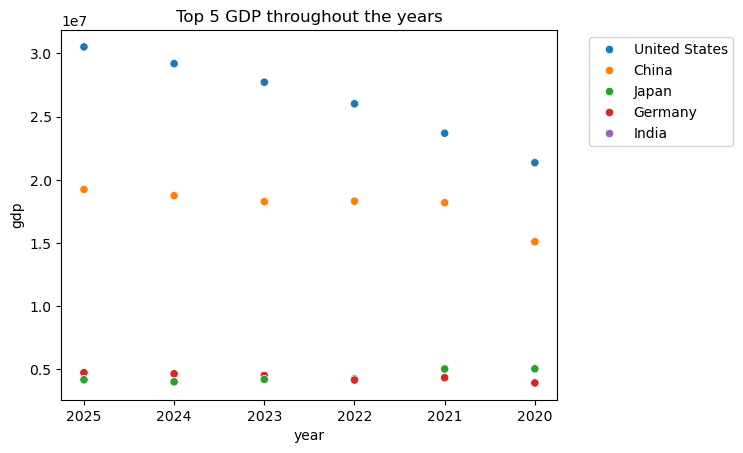

In [149]:
sns.scatterplot(x=top5GDP2020['year'], y=top5GDP2020['gdp'], hue=top5GDP2020['Country'])
plt.title("Top 5 GDP throughout the years")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

In [113]:
country['avg_gdp'] = country[['2020','2021','2022','2023','2024','2025']].mean(axis=1)
print(country.head())

       Country    2020      2021      2022      2023      2024      2025  \
0  Afghanistan   20136   14278.0   14501.0   17248.0       NaN       NaN   
1      Albania   15271   18086.0   19185.0   23388.0   27259.0   28372.0   
2      Algeria  164774  185850.0  225709.0  247789.0  264913.0  268885.0   
3      Andorra    2885    3325.0    3376.0    3786.0    4038.0    4035.0   
4       Angola   66521   84375.0  142442.0  109764.0  115946.0  113343.0   

         avg_gdp  
0   16540.750000  
1   21926.833333  
2  226320.000000  
3    3574.166667  
4  105398.500000  


In [114]:
avg = country.sort_values(by='avg_gdp', ascending=False)
print(avg.head())

           Country      2020        2021        2022        2023        2024  \
186  United States  21354125  23681175.0  26006900.0  27720725.0  29184900.0   
36           China  15103357  18190803.0  18307816.0  18270351.0  18748009.0   
85           Japan   5054069   5039148.0   4262146.0   4213167.0   4026211.0   
64         Germany   3936989   4351188.0   4166872.0   4527009.0   4658526.0   
77           India   2674852   3167271.0   3346107.0   3638490.0   3909097.0   

           2025       avg_gdp  
186  30507217.0  2.640917e+07  
36   19231705.0  1.797534e+07  
85    4186431.0  4.463529e+06  
64    4744804.0  4.397565e+06  
77    4187017.0  3.487139e+06  


In [115]:
avg_2020 = avg.melt(id_vars='Country', value_name='gdp', var_name='year').head(5)
print(avg_2020)

         Country  year         gdp
0  United States  2020  21354125.0
1          China  2020  15103357.0
2          Japan  2020   5054069.0
3        Germany  2020   3936989.0
4          India  2020   2674852.0


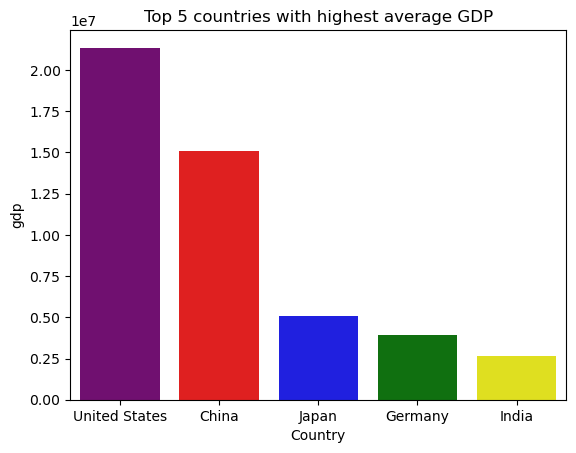

In [154]:
sns.barplot(x=avg_2020['Country'], y=avg_2020['gdp'], hue=avg_2020['Country'], palette=['purple','red','blue','green','yellow'])
plt.title("Top 5 countries with highest average GDP")
plt.show()

In [117]:
countries_need = ['United States', 'China', 'Japan', 'Germany', 'India']

top_5 = country_ag[country_ag['Country'].isin(countries_need)]
print(top_5)

            Country  year         gdp
36            China  2020  15103357.0
64          Germany  2020   3936989.0
77            India  2020   2674852.0
85            Japan  2020   5054069.0
186   United States  2020  21354125.0
232           China  2021  18190803.0
260         Germany  2021   4351188.0
273           India  2021   3167271.0
281           Japan  2021   5039148.0
382   United States  2021  23681175.0
428           China  2022  18307816.0
456         Germany  2022   4166872.0
469           India  2022   3346107.0
477           Japan  2022   4262146.0
578   United States  2022  26006900.0
624           China  2023  18270351.0
652         Germany  2023   4527009.0
665           India  2023   3638490.0
673           Japan  2023   4213167.0
774   United States  2023  27720725.0
820           China  2024  18748009.0
848         Germany  2024   4658526.0
861           India  2024   3909097.0
869           Japan  2024   4026211.0
970   United States  2024  29184900.0
1016        

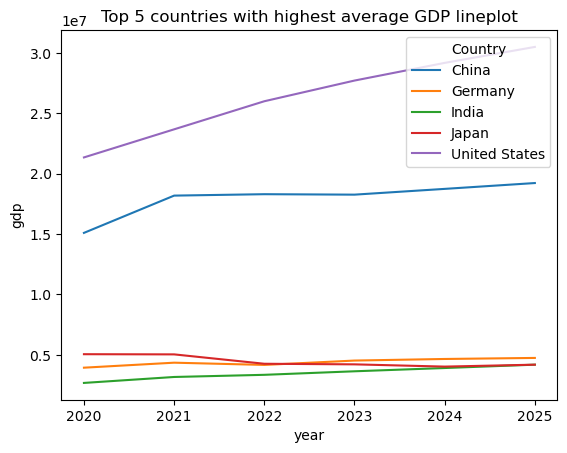

In [155]:
sns.lineplot(data=top_5, x='year', y='gdp', hue='Country')
plt.title("Top 5 countries with highest average GDP lineplot")
plt.show()

In [119]:
btm = country.sort_values(by='avg_gdp', ascending=True).head(5)
print(btm)

              Country  2020   2021   2022   2023   2024   2025     avg_gdp
181            Tuvalu    52   62.0   61.0   63.0   65.0   65.0   61.333333
121             Nauru   125  176.0  152.0  152.0  161.0  169.0  155.833333
109  Marshall Islands   242  259.0  253.0  259.0  280.0  297.0  265.000000
132             Palau   259  236.0  248.0  275.0  306.0  333.0  276.166667
89           Kiribati   222  285.0  271.0  289.0  308.0  312.0  281.166667


In [120]:
bottom_countries = ['Tuvalu','Nauru','Marshall Islands','Palau','Kiribati']

bottom_5 = country_ag[country_ag['Country'].isin(bottom_countries)]
print(bottom_5)

               Country  year    gdp
89            Kiribati  2020  222.0
109   Marshall Islands  2020  242.0
121              Nauru  2020  125.0
132              Palau  2020  259.0
181             Tuvalu  2020   52.0
285           Kiribati  2021  285.0
305   Marshall Islands  2021  259.0
317              Nauru  2021  176.0
328              Palau  2021  236.0
377             Tuvalu  2021   62.0
481           Kiribati  2022  271.0
501   Marshall Islands  2022  253.0
513              Nauru  2022  152.0
524              Palau  2022  248.0
573             Tuvalu  2022   61.0
677           Kiribati  2023  289.0
697   Marshall Islands  2023  259.0
709              Nauru  2023  152.0
720              Palau  2023  275.0
769             Tuvalu  2023   63.0
873           Kiribati  2024  308.0
893   Marshall Islands  2024  280.0
905              Nauru  2024  161.0
916              Palau  2024  306.0
965             Tuvalu  2024   65.0
1069          Kiribati  2025  312.0
1089  Marshall Islands  2025

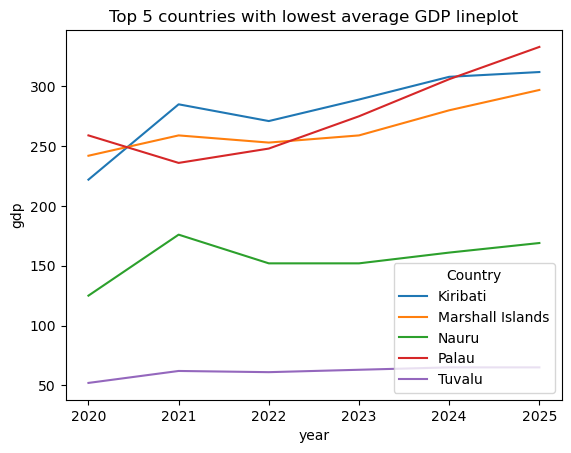

In [167]:
sns.lineplot(data=bottom_5, x='year', y='gdp', hue='Country')
plt.title("Top 5 countries with lowest average GDP lineplot")
plt.show()

In [168]:
top_and_btm = pd.concat([top_5, bottom_5], ignore_index=True)
print(top_and_btm)

             Country  year         gdp
0              China  2020  15103357.0
1            Germany  2020   3936989.0
2              India  2020   2674852.0
3              Japan  2020   5054069.0
4      United States  2020  21354125.0
5              China  2021  18190803.0
6            Germany  2021   4351188.0
7              India  2021   3167271.0
8              Japan  2021   5039148.0
9      United States  2021  23681175.0
10             China  2022  18307816.0
11           Germany  2022   4166872.0
12             India  2022   3346107.0
13             Japan  2022   4262146.0
14     United States  2022  26006900.0
15             China  2023  18270351.0
16           Germany  2023   4527009.0
17             India  2023   3638490.0
18             Japan  2023   4213167.0
19     United States  2023  27720725.0
20             China  2024  18748009.0
21           Germany  2024   4658526.0
22             India  2024   3909097.0
23             Japan  2024   4026211.0
24     United States  202

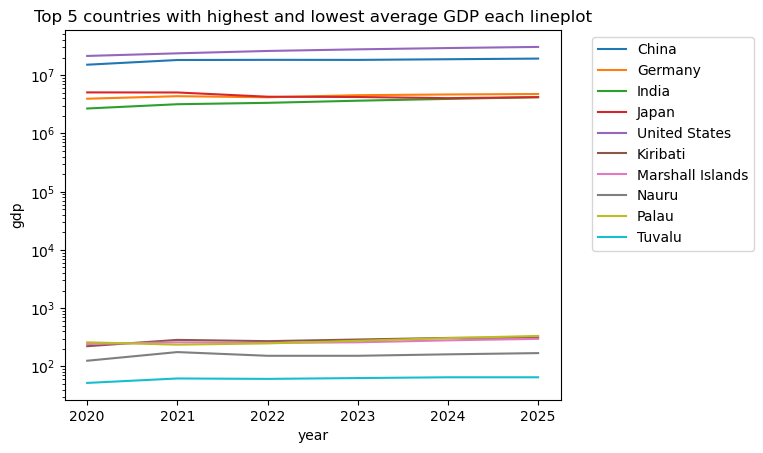

In [169]:
# Together
sns.lineplot(data=top_and_btm, x='year', y='gdp', hue='Country')
plt.title("Top 5 countries with highest and lowest average GDP each lineplot")
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

In [170]:
df_clean['Country'] = df_clean['Country'].replace('United States of America', 'United States')
new_country = country_ag.merge(df_clean, on='Country')
print(new_country.head())

       Country  year       gdp Continent
0  Afghanistan  2020   20136.0      Asia
1      Albania  2020   15271.0    Europe
2      Algeria  2020  164774.0    Africa
3      Andorra  2020    2885.0    Europe
4       Angola  2020   66521.0    Africa


In [171]:
country_continent_year = new_country.groupby(['Continent', 'year', 'Country'])['gdp'].sum().reset_index()
print("Continent_year: ", country_continent_year)

Continent_year:            Continent  year       Country       gdp
0            Africa  2020       Algeria  164774.0
1            Africa  2020        Angola   66521.0
2            Africa  2020         Benin   15674.0
3            Africa  2020      Botswana   14930.0
4            Africa  2020  Burkina Faso   17837.0
...             ...   ...           ...       ...
1033  South America  2025        Guyana   25822.0
1034  South America  2025      Paraguay   45465.0
1035  South America  2025          Peru  303293.0
1036  South America  2025      Suriname    4506.0
1037  South America  2025       Uruguay   79731.0

[1038 rows x 4 columns]


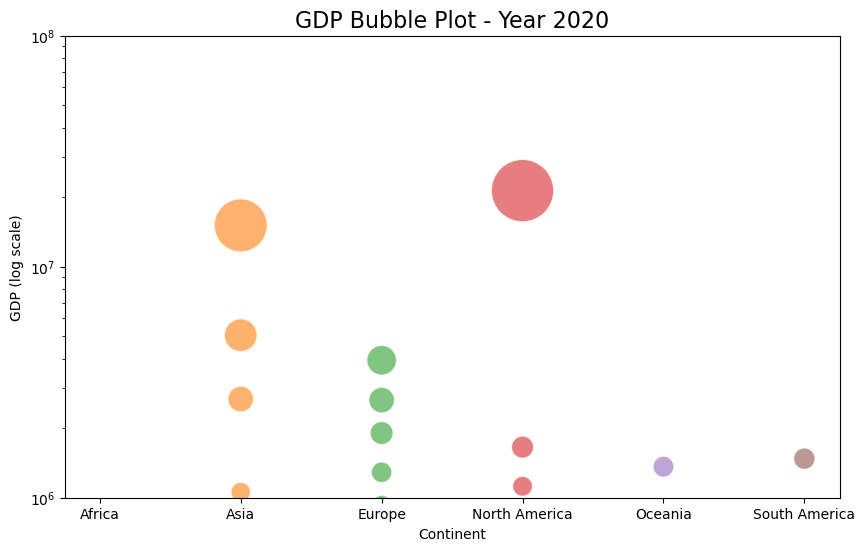

In [172]:
fig, ax = plt.subplots(figsize=(10, 6))
years = sorted(country_continent_year['year'].unique())

def animate(i):
    ax.clear()
    current_year = years[i]
    
    data = country_continent_year[country_continent_year['year'] == current_year]
    
    sns.scatterplot(
        data=data,
        x="Continent",
        y="gdp",
        hue="Continent",
        size="gdp",
        sizes=(100, 2000),
        alpha=0.6,
        ax=ax,
        legend=False
    )
    
    ax.set_title(f"GDP Bubble Plot - Year {current_year}", fontsize=16)
    ax.set_ylabel("GDP (log scale)")
    ax.set_xlabel("Continent")
    ax.set_yscale("log")
    ax.set_ylim(1e6, 1e8)

animation = FuncAnimation(fig, animate, frames=len(years), interval=1000, repeat=False)
HTML(animation.to_jshtml())

# GDP trend in America from 2023 - 2025

Techboom and AI

In [174]:
us = country_ag[country_ag['Country'] == 'United States']
print(us)

us_years = us[us['year'].astype(int) >= 2023]   
print(us_years)

            Country  year         gdp
186   United States  2020  21354125.0
382   United States  2021  23681175.0
578   United States  2022  26006900.0
774   United States  2023  27720725.0
970   United States  2024  29184900.0
1166  United States  2025  30507217.0
            Country  year         gdp
774   United States  2023  27720725.0
970   United States  2024  29184900.0
1166  United States  2025  30507217.0


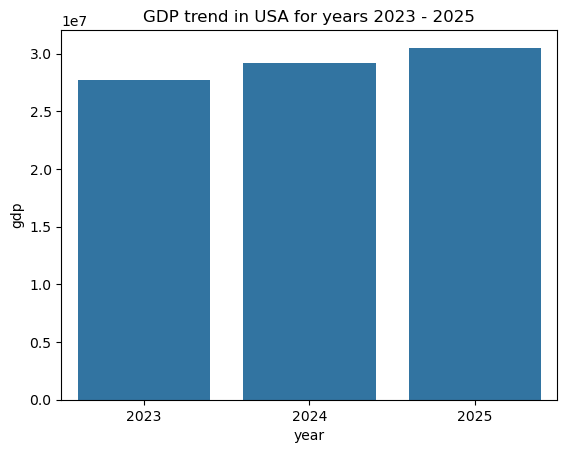

In [175]:
bar_us = sns.barplot(x = us_years['year'], y=us_years['gdp'])
plt.title("GDP trend in USA for years 2023 - 2025")
plt.show()

# GDP trend in Russia and Ukraine from 2023 - 2025

Russia-Ukraine War

In [176]:
rus_ukr = country_ag[country_ag['Country'].isin(['Russia','Ukraine'])]
print(rus_ukr)

rus_ukr_yr = rus_ukr[rus_ukr['year'].isin(['2022','2023','2024','2025'])]
print(rus_ukr_yr)

rus_ukr_yr = rus_ukr_yr.pivot(index='Country', values='gdp', columns='year')
print(rus_ukr_yr)

      Country  year        gdp
143    Russia  2020  1488118.0
183   Ukraine  2020   156566.0
339    Russia  2021  1828927.0
379   Ukraine  2021   199835.0
535    Russia  2022  2295527.0
575   Ukraine  2022   161987.0
731    Russia  2023  2059762.0
771   Ukraine  2023   178763.0
927    Russia  2024  2161205.0
967   Ukraine  2024   190426.0
1123   Russia  2025  2076396.0
1163  Ukraine  2025   205742.0
      Country  year        gdp
535    Russia  2022  2295527.0
575   Ukraine  2022   161987.0
731    Russia  2023  2059762.0
771   Ukraine  2023   178763.0
927    Russia  2024  2161205.0
967   Ukraine  2024   190426.0
1123   Russia  2025  2076396.0
1163  Ukraine  2025   205742.0
year          2022       2023       2024       2025
Country                                            
Russia   2295527.0  2059762.0  2161205.0  2076396.0
Ukraine   161987.0   178763.0   190426.0   205742.0


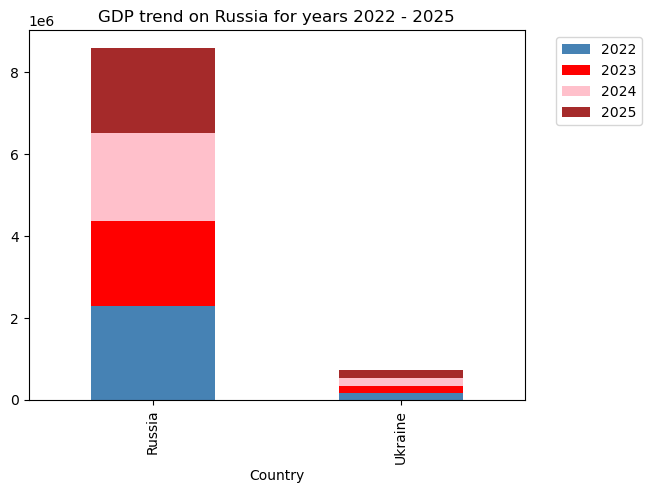

In [178]:
bar_rus = rus_ukr_yr.plot(kind='bar', stacked=True, color=['steelblue','red', 'pink', 'brown'])
plt.title("GDP trend on Russia for years 2022 - 2025")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# GDP trend in India from 2020 - 2022

COVID-19

In [179]:
ind = country_ag[country_ag['Country'] == 'India']
print(ind)

ind_yr = ind[ind['year'].isin(['2020','2021','2022'])]
print(ind_yr)

     Country  year        gdp
77     India  2020  2674852.0
273    India  2021  3167271.0
469    India  2022  3346107.0
665    India  2023  3638490.0
861    India  2024  3909097.0
1057   India  2025  4187017.0
    Country  year        gdp
77    India  2020  2674852.0
273   India  2021  3167271.0
469   India  2022  3346107.0


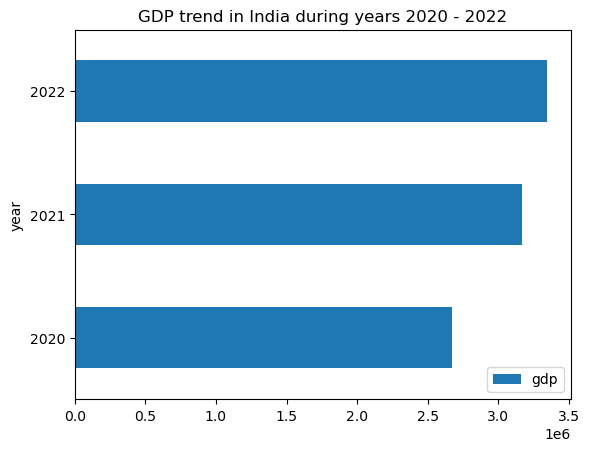

In [180]:
bar_ind = ind_yr.plot(kind='barh', x='year', y='gdp')
plt.title("GDP trend in India during years 2020 - 2022")
plt.show()

# Growth Rates by Continent (Heatmap)

In [184]:
print(country_continent_year.head())
continent_heatmap_data = country_continent_year.groupby(['Continent','year'])['gdp'].sum().reset_index()
print(continent_heatmap_data.head())

data_pivoted_continent = continent_heatmap_data.pivot(index='Continent', values='gdp', columns='year')

  Continent  year       Country       gdp
0    Africa  2020       Algeria  164774.0
1    Africa  2020        Angola   66521.0
2    Africa  2020         Benin   15674.0
3    Africa  2020      Botswana   14930.0
4    Africa  2020  Burkina Faso   17837.0
  Continent  year        gdp
0    Africa  2020  2362976.0
1    Africa  2021  2632070.0
2    Africa  2022  2851588.0
3    Africa  2023  2714977.0
4    Africa  2024  2609443.0


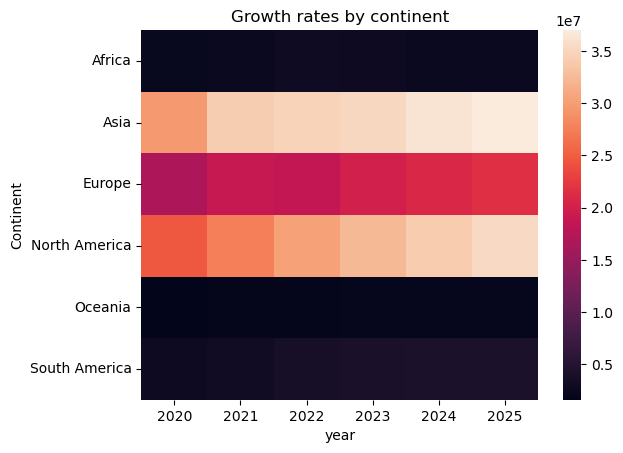

In [187]:
continent_heatmap = sns.heatmap(data=data_pivoted_continent)
plt.title("Growth rates by continent")
plt.show()

In [188]:
country_chekc = country_continent_year[country_continent_year['Country'] == 'United States']
print(country_chekc)

         Continent  year        Country         gdp
779  North America  2020  United States  21354125.0
803  North America  2021  United States  23681175.0
827  North America  2022  United States  26006900.0
851  North America  2023  United States  27720725.0
875  North America  2024  United States  29184900.0
899  North America  2025  United States  30507217.0


# Hypothesis Testing for Developed VS Developing Coountries using Mann Whitney U

In [133]:
developed_countries = [
    "Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czech Republic",
    "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary",
    "Iceland", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta",
    "Netherlands", "Norway", "Poland", "Portugal", "Romania", "Slovakia",
    "Slovenia", "Spain", "Sweden", "Switzerland", "United Kingdom", "Canada", "United States",
    "Australia", "Japan", "South Korea", "New Zealand"
]


In [134]:
country_continent_year['Type'] = country_continent_year['Country'].apply(
    lambda x: 'Developed' if x in developed_countries else 'Developing'
)

In [135]:
print(country_continent_year.head())

  Continent  year       Country       gdp        Type
0    Africa  2020       Algeria  164774.0  Developing
1    Africa  2020        Angola   66521.0  Developing
2    Africa  2020         Benin   15674.0  Developing
3    Africa  2020      Botswana   14930.0  Developing
4    Africa  2020  Burkina Faso   17837.0  Developing


In [136]:
developed = country_continent_year[country_continent_year['Type'] == 'Developed']
developing = country_continent_year[country_continent_year['Type'] == 'Developing']

In [137]:
print(developed.head())

    Continent  year Country        gdp       Type
302      Asia  2020  Cyprus    25535.0  Developed
308      Asia  2020   Japan  5054069.0  Developed
342      Asia  2021  Cyprus    30393.0  Developed
348      Asia  2021   Japan  5039148.0  Developed
382      Asia  2022  Cyprus    31001.0  Developed


In [138]:
p1, U = mannwhitneyu(developed['gdp'], developing['gdp'], method='asymptotic')
print('p1: ', p1, "U: ", U)

p1:  142399.0 U:  1.8859649700103836e-50


As we can see from above results,
GDP distributions between developed and developing countries are not the same.

The p-value we got (~1.88e-50) is astronomically small, which means that the difference is highly significant.

This shows that developed countries consistently have higher GDPs than developing ones.

Also, the U-value (142,399) measures how the GDP values of one group compares to the other. So, high U value and tiny p-value means that th groups are separated enough and the GDP distributions barely overlap

# Correlation between Year and GDP

In [139]:
country_continent_year['year'] = country_continent_year['year'].astype(int)
correlation = np.corrcoef(country_continent_year['year'],country_continent_year['gdp'])[0,1]
print(correlation)

0.018489578178390694


As we can see, the corr value (0.018489578178390694) is near to 0, which means there is almost **no linear correlation** between **year** and **gdp** values.

# Countries where GDP is decreasing

In [140]:
decr_pivot = country_continent_year.pivot(index='Country', values='gdp', columns='year')
decreasingGDP = decr_pivot[decr_pivot[2025] < decr_pivot[2020]]
decreasingGDP = decreasingGDP[decreasingGDP[2025] != 0.0]
decreasingGDP = decreasingGDP[decreasingGDP[2020] != 0.0]
print(decreasingGDP)

year              2020       2021       2022       2023       2024       2025
Country                                                                      
Egypt         382525.0   423300.0   475231.0   393828.0   383109.0   347342.0
Japan        5054069.0  5039148.0  4262146.0  4213167.0  4026211.0  4186431.0
Myanmar        65631.0    58264.0    61723.0    61466.0    61176.0    64944.0
Nigeria       432299.0   441074.0   476468.0   363816.0   187640.0   188271.0
South Sudan     5423.0     5940.0     8037.0     7186.0     5423.0     3998.0
Sudan          35237.0    35142.0    33517.0    36998.0    28270.0    31506.0
Timor-Leste     2163.0     3625.0     3209.0     2080.0     2015.0     2115.0
Yemen          20220.0    19394.0    23534.0    19412.0    19101.0    17401.0


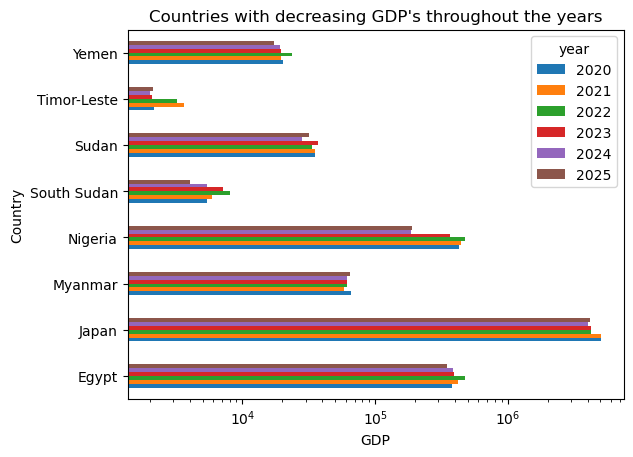

In [192]:
decreasingGDP.plot(kind='barh')
plt.title("Countries with decreasing GDP's throughout the years")
plt.xlabel('GDP')
plt.xscale('log')
plt.show()

       Country  year        gdp
0        Egypt  2020   382525.0
1        Japan  2020  5054069.0
2      Myanmar  2020    65631.0
3      Nigeria  2020   432299.0
4  South Sudan  2020     5423.0


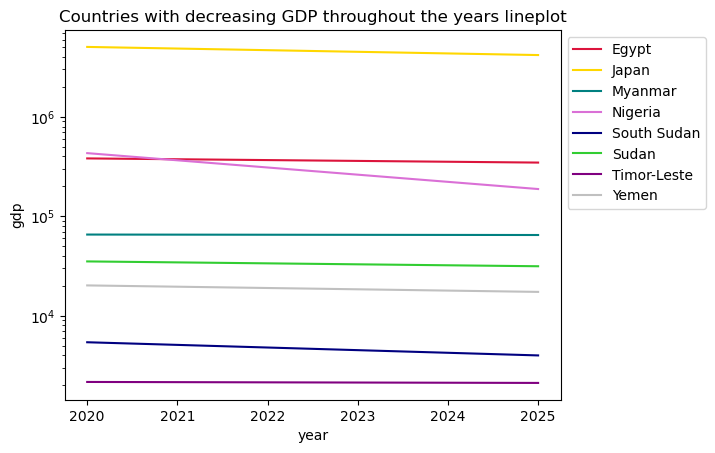

In [199]:
new_dec = decreasingGDP.reset_index().melt(id_vars='Country', value_vars=[2020,2025], var_name='year', value_name='gdp')
print(new_dec.head())
sns.lineplot(x=new_dec['year'], y=new_dec['gdp'], hue=new_dec['Country'], palette = ['crimson', 'gold', 'teal', 'orchid', 'navy', 'limegreen', 'purple', 'silver'])
plt.title("Countries with decreasing GDP throughout the years lineplot")
plt.yscale('log')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


Above are the countries whose GDP have decreased between 2020 and 2025.

# Conclusion:

From 2020 - 2025, GDP trends show a complex economic landscape shaped by pandemics, wars and so much more. While most developed countries have been able to rebound, developing nations have faced decline.

**GDP Decline:** A few countries experienced decline of GDP throughout the years.

**Weak Correlation:** The overall correlation between year and GDP was very low which was surprising. This suggests that the growth patters are heavily influenced by country-specific events.

**Statistical Significance:** Hypothesis tests confirmed a big difference in the GDP distributions between the developed and developing nations.

**Difference in Continents:** Some continents like Asia and North America have a surge while others like Ocenia and Africa have lagged behind.

This project has been blended with statistics as well as visual storytelling, which makes economic data accessible. It shows the importance of looking beyong the aggregated metrics to actually understand the hidden realities.

**Analysed By: Apala Lamichhane**